<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 :  Probecard Identification.

## Part 2 :Initial EDA Brief

---

# Data Preparation
Calculating & Removing Outliers

Missing Data in Pandas DataFrames

Filtering inappropriate values

Finding duplicate rows



In [8]:
import numpy as np
import pandas as pd
import ast
import csv
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats


import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv("Probecard_master_list.csv")
features = ['Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Propagation_delay','Rise_time','Fall_time','Resistance','Functional']


df.columns = ['Probecard','Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Propagation_delay','Rise_time','Fall_time','Resistance','Functional']

df_probecard = df['Probecard']
dfx = df[features]

df1 = df[1::]

## Dataset features : 

### ['Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Propagation_delay','Rise_time','Fall_time','Resistance','Functional']



In [9]:
df1.tail()

,Probecard,Freq1,Freq2,PRR_record,Temp_coeff,Test_time,Power_supply,Propagation_delay,Rise_time,Fall_time,Resistance,Functional
3995,PC04,15.50,15.34,1121,23.4,2.79,14.25,2.38,256,243,1.805,506.163
3996,PC04,13.10,14.98,1124,22.8,2.54,14.05,1.87,277,222,1.959,527.740
3997,PC04,17.53,11.64,1121,24.3,2.11,15.64,4.32,208,289,1.607,459.666
3998,PC04,20.10,11.23,1121,24.6,1.67,16.60,4.91,189,311,1.486,439.228
3999,PC04,14.01,15.05,1124,23.2,2.60,13.43,1.85,273,226,1.809,523.493


## Dataset Target :
### PC01 , PC02 , PC03 , PC04


In [10]:
df.Probecard.head()

0    PC01
1    PC01
2    PC01
3    PC01
4    PC01
Name: Probecard, dtype: object

## Drop duplicates if there is any


In [11]:
df.drop_duplicates(keep='last', inplace = True)

## Check for null data

Check if there is any null data

In [14]:
df.isnull().sum()

Probecard            0
Freq1                0
Freq2                0
PRR_record           0
Temp_coeff           0
Test_time            0
Power_supply         0
Propagation_delay    0
Rise_time            0
Fall_time            0
Resistance           0
Functional           0
dtype: int64

## Info of the Data Set


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 12 columns):
Probecard            4000 non-null object
Freq1                4000 non-null float64
Freq2                4000 non-null float64
PRR_record           4000 non-null int64
Temp_coeff           4000 non-null float64
Test_time            4000 non-null float64
Power_supply         4000 non-null float64
Propagation_delay    4000 non-null float64
Rise_time            4000 non-null int64
Fall_time            4000 non-null int64
Resistance           4000 non-null float64
Functional           4000 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 406.2+ KB


## Shape of the Data Set
### [4000,12]


In [16]:
df.shape

(4000, 12)

In [17]:
df.describe()

,Freq1,Freq2,PRR_record,Temp_coeff,Test_time,Power_supply,Propagation_delay,Rise_time,Fall_time,Resistance,Functional
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,13.488410,14.993922,1121.736500,23.50040,2.445788,15.002043,2.552428,286.993500,212.006250,1.680002,25.001010
std,3.163932,1.964082,1.291311,1.37611,0.716829,2.320909,1.652979,49.783708,42.545202,0.252046,315.540934
min,2.610000,7.540000,1121.000000,16.30000,-1.010000,1.320000,-4.580000,87.000000,24.000000,0.687000,-475.892000
25%,11.407500,13.850000,1121.000000,22.70000,2.010000,14.037500,1.580000,258.000000,198.000000,1.549000,-250.536000
50%,13.040000,15.340000,1121.000000,23.50000,2.440000,15.010000,2.550000,298.000000,200.000000,1.740000,-50.004500
75%,15.540000,16.380000,1121.000000,24.30000,2.890000,15.990000,3.520000,308.000000,224.250000,1.856000,291.532000
max,25.140000,21.150000,1124.000000,30.10000,5.710000,28.620000,9.350000,476.000000,411.000000,2.317000,676.007000


## Check for missing data

### Check if there is any missing data

In [18]:
df_no_missing = df.dropna()
df_no_missing
df_no_missing.shape

(4000, 12)

## Boxplot of Freq1 versus Probecard


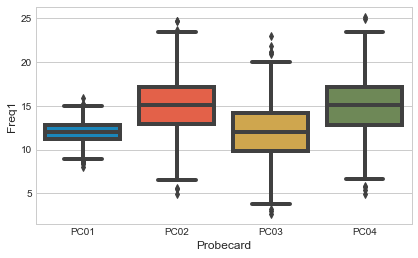

In [19]:
import seaborn as sns
sns.set_style("whitegrid")

sns.boxplot(x="Probecard",y="Freq1",data=df)

## Boxplot of Resistance versus Probecard


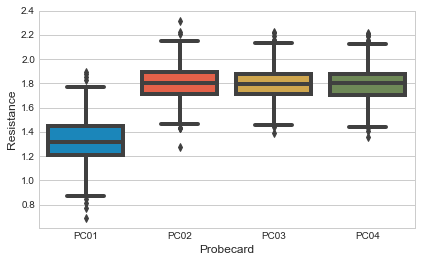

In [20]:
sns.boxplot(x="Probecard",y="Resistance",data=df)

## Boxplot of Rise_time versus Probecard


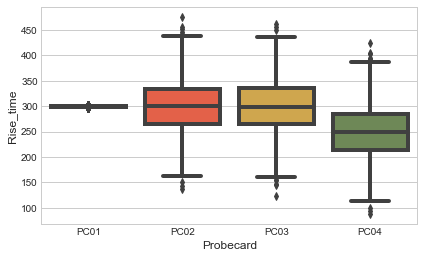

In [21]:
sns.boxplot(x="Probecard",y="Rise_time",data=df)

## Pairplot  
### Features Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply' 
### Target 'Probecard'


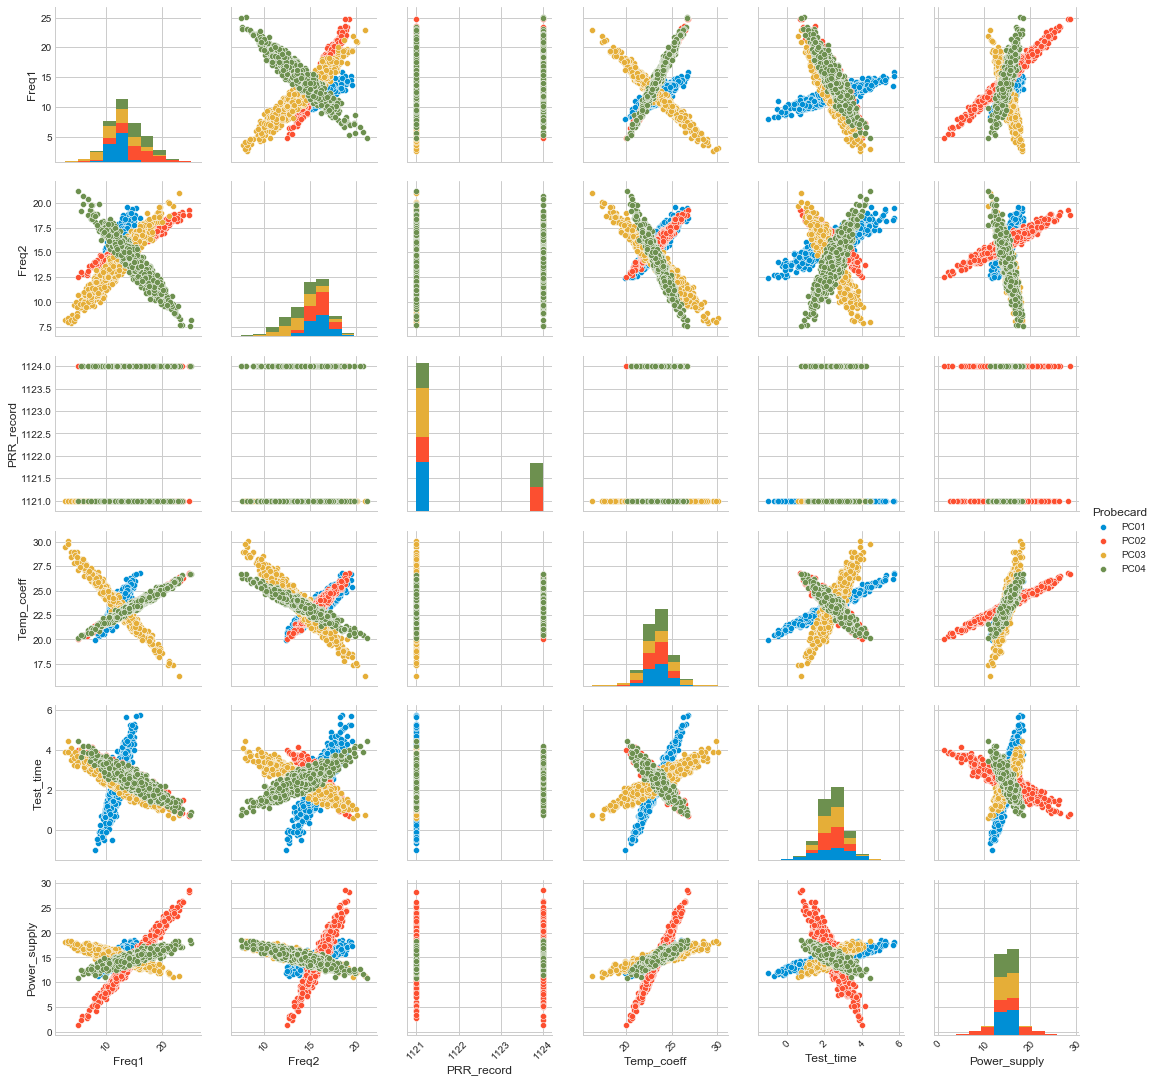

In [22]:

g = sns.pairplot(df[['Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Probecard']],hue="Probecard",diag_kind="hist")
for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45 )

## Pairplot  
### Features 'Propagation_delay','Rise_time','Fall_time','Resistance','Functional'
### Target 'Probecard'


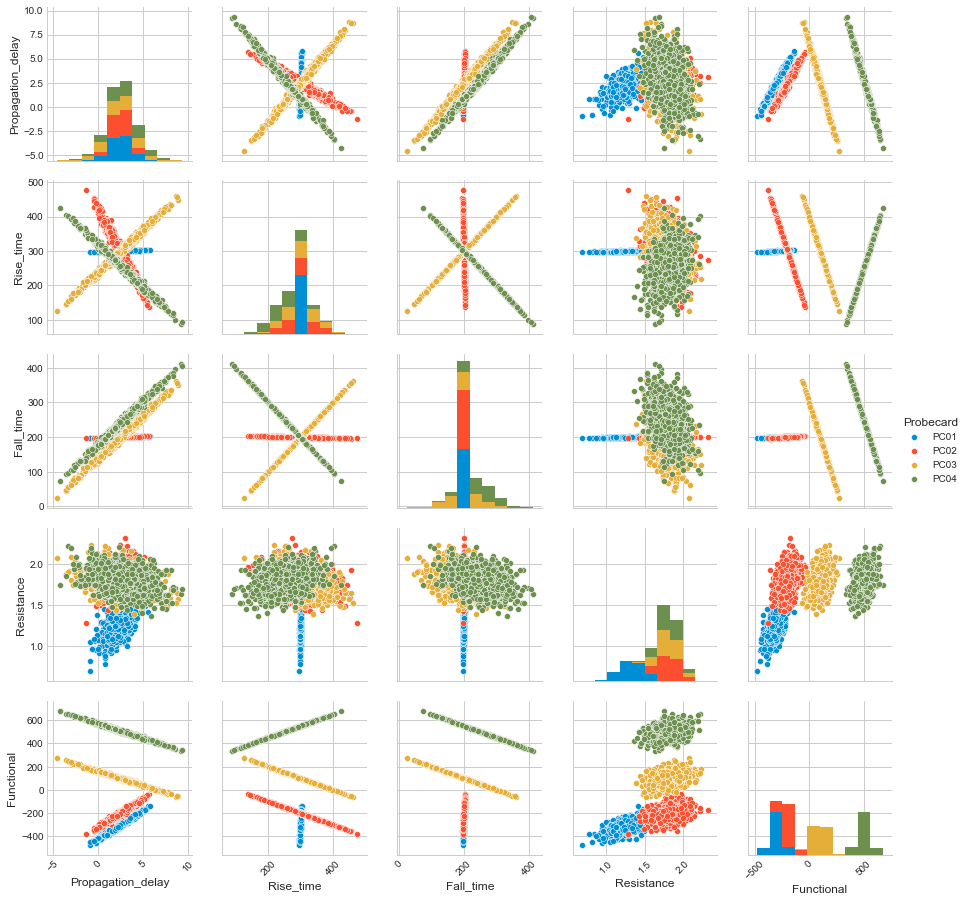

In [23]:
g = sns.pairplot(df[['Propagation_delay','Rise_time','Fall_time','Resistance','Functional','Probecard']],hue="Probecard",diag_kind="hist")
for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45 )

## Removal of unique outlier (maximum outlier) .




In [24]:
#totsl_features = 
df.iloc[0:0]
#print (total_features)
for i,x in enumerate(df.iloc[0:0]):
   
    dummy_max = df.loc[df[x] == df[x].max()]
    if (len(dummy_max)==1) :
        print ("The  unique MAX value for ",x , "is " , df[x].max() , "\n")
        print (dummy_max,"\n")
        #shd.drop(703, inplace = True)
        print (dummy_max.index[0])
        df.drop(dummy_max.index[0], inplace = True )
        print (df.shape)
    else :
        print ( "There is no unique MAX value for ", x ,"\n")

There is no unique MAX value for  Probecard 

The  unique MAX value for  Freq1 is  25.14 

     Probecard  Freq1  Freq2  PRR_record  Temp_coeff  Test_time  Power_supply  \
3644      PC04  25.14   8.12        1124        26.7       0.91         17.83   

      Propagation_delay  Rise_time  Fall_time  Resistance  Functional  
3644               9.18         87        411       1.636     338.317   

3644
(3999, 12)
The  unique MAX value for  Freq2 is  21.15 

     Probecard  Freq1  Freq2  PRR_record  Temp_coeff  Test_time  Power_supply  \
3554      PC04   4.94  21.15        1121        20.1       4.42          10.9   

      Propagation_delay  Rise_time  Fall_time  Resistance  Functional  
3554              -4.28        425         73       1.744     676.007   

3554
(3998, 12)
There is no unique MAX value for  PRR_record 

The  unique MAX value for  Temp_coeff is  30.1 

     Probecard  Freq1  Freq2  PRR_record  Temp_coeff  Test_time  Power_supply  \
2644      PC03   3.19   8.35        1

## Removal of unique outlier (minimum outlier) .



In [25]:
#totsl_features = 
df.iloc[0:0]
#print (total_features)
for i,x in enumerate(df.iloc[0:0]):
   
    dummy_min = df.loc[df[x] == df[x].min()]
    if (len(dummy_min)==1) :
        print ("The  unique MIN value for ",x , "is " , df[x].min() , "\n")
        print (dummy_min,"\n")
        #shd.drop(703, inplace = True)
        print (dummy_min.index[0])
        df.drop(dummy_min.index[0], inplace = True )
        print (df.shape)
    else :
        print ( "There is no unique MAX value for ", x ,"\n")

There is no unique MAX value for  Probecard 

The  unique MIN value for  Freq1 is  2.61 

     Probecard  Freq1  Freq2  PRR_record  Temp_coeff  Test_time  Power_supply  \
2142      PC03   2.61   8.17        1121        29.5       3.88         18.22   

      Propagation_delay  Rise_time  Fall_time  Resistance  Functional  
2142               8.83        449        349       1.574     -48.915   

2142
(3989, 12)
The  unique MIN value for  Freq2 is  7.69 

     Probecard  Freq1  Freq2  PRR_record  Temp_coeff  Test_time  Power_supply  \
3211      PC04  23.11   7.69        1124        26.3       0.86          17.4   

      Propagation_delay  Rise_time  Fall_time  Resistance  Functional  
3211               8.17        113        386       1.525     363.472   

3211
(3988, 12)
There is no unique MAX value for  PRR_record 

The  unique MIN value for  Temp_coeff is  16.3 

     Probecard  Freq1  Freq2  PRR_record  Temp_coeff  Test_time  Power_supply  \
2554      PC03  22.98  20.96        112

## Calculating and Removing Outliers

### Standard Deviations:  Removal of  outlier for the features and keep  95 percent of the data  within 1.96 standard deviations

In [27]:
copydf_sd  =  df
copydf_sd.shape
for i,x in enumerate(features):
    stdX  =  df[(x)].std()
    meanX =  df[x].mean()
    topX  =  meanX  +  stdX  *  1.95
    botX  =  meanX -  stdX  *  1.95

    #copydf  =  X

    copydf_sd  = copydf_sd.drop(copydf_sd[copydf_sd[x]>  topX].index)
    copydf_sd  = copydf_sd.drop(copydf_sd[copydf_sd[x]<  botX].index)
    copydf_sd = copydf_sd.sort_values(by=[x])
    print ("The shape of copydf after   ",x,"  using standard deviation    removal is  ", copydf_sd.shape)

copydf_sd.shape

The shape of copydf after    Freq1   using standard deviation    removal is   (3746, 12)
The shape of copydf after    Freq2   using standard deviation    removal is   (3661, 12)
The shape of copydf after    PRR_record   using standard deviation    removal is   (3661, 12)
The shape of copydf after    Temp_coeff   using standard deviation    removal is   (3551, 12)
The shape of copydf after    Test_time   using standard deviation    removal is   (3376, 12)
The shape of copydf after    Power_supply   using standard deviation    removal is   (3176, 12)
The shape of copydf after    Propagation_delay   using standard deviation    removal is   (3143, 12)
The shape of copydf after    Rise_time   using standard deviation    removal is   (3119, 12)
The shape of copydf after    Fall_time   using standard deviation    removal is   (3053, 12)
The shape of copydf after    Resistance   using standard deviation    removal is   (2902, 12)
The shape of copydf after    Functional   using standard deviati

(2902, 12)

## Final Dataset after the data preparation
### Data is quite balance among the 4 probecards.


In [28]:
copydf_sd.groupby('Probecard').Probecard.count()

Probecard
PC01    662
PC02    714
PC03    778
PC04    748
Name: Probecard, dtype: int64

## Pairplot  of the revised dataset
### Features Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply' 
### Target 'Probecard'


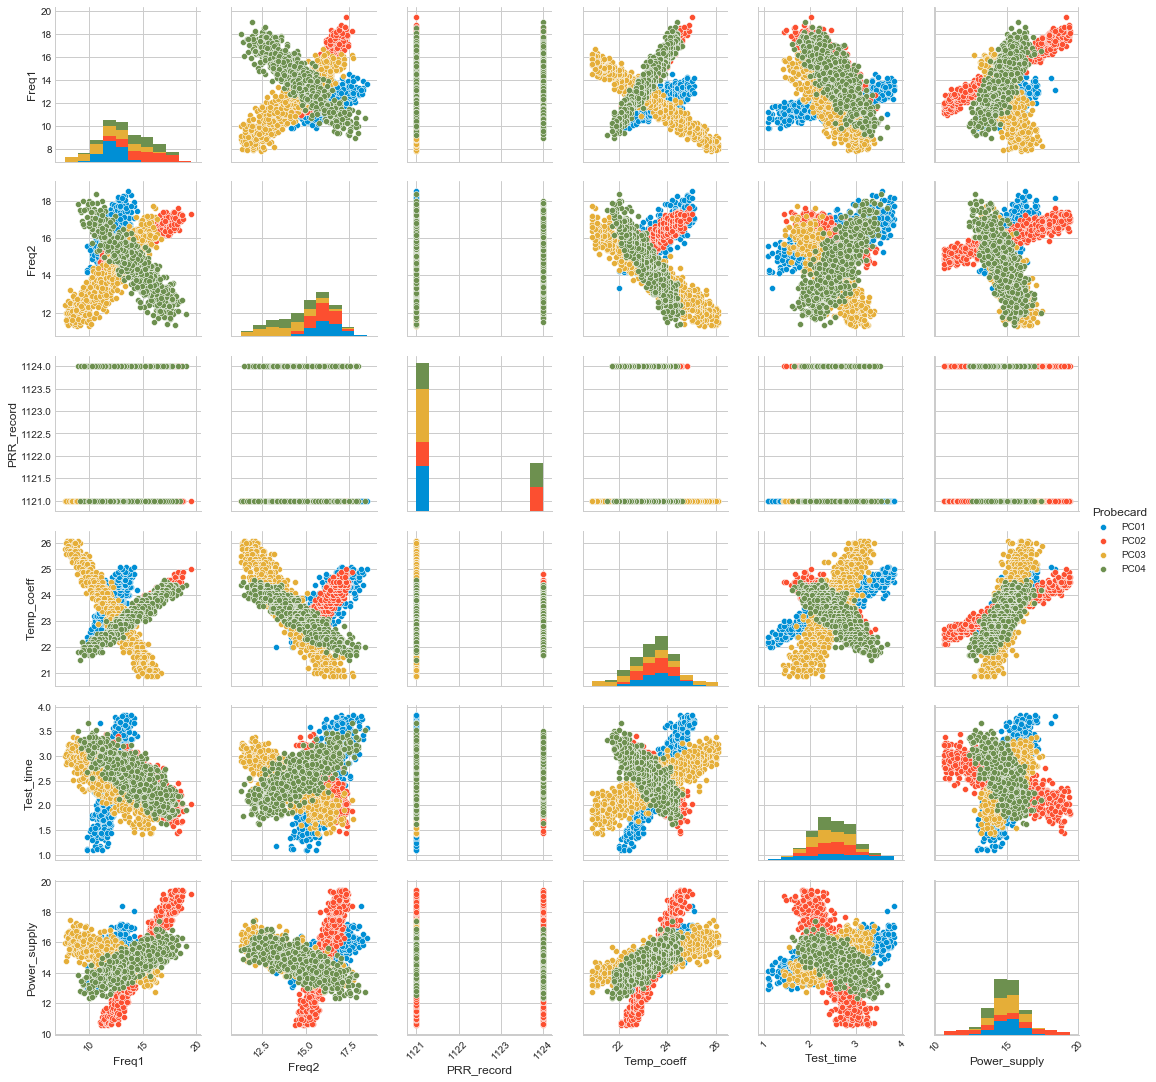

In [29]:
g = sns.pairplot(copydf_sd[['Freq1','Freq2','PRR_record','Temp_coeff','Test_time','Power_supply','Probecard']],hue="Probecard",diag_kind="hist")
for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45 )

## Pairplot   of the revised dataset
### Features 'Propagation_delay','Rise_time','Fall_time','Resistance','Functional'
### Target 'Probecard'


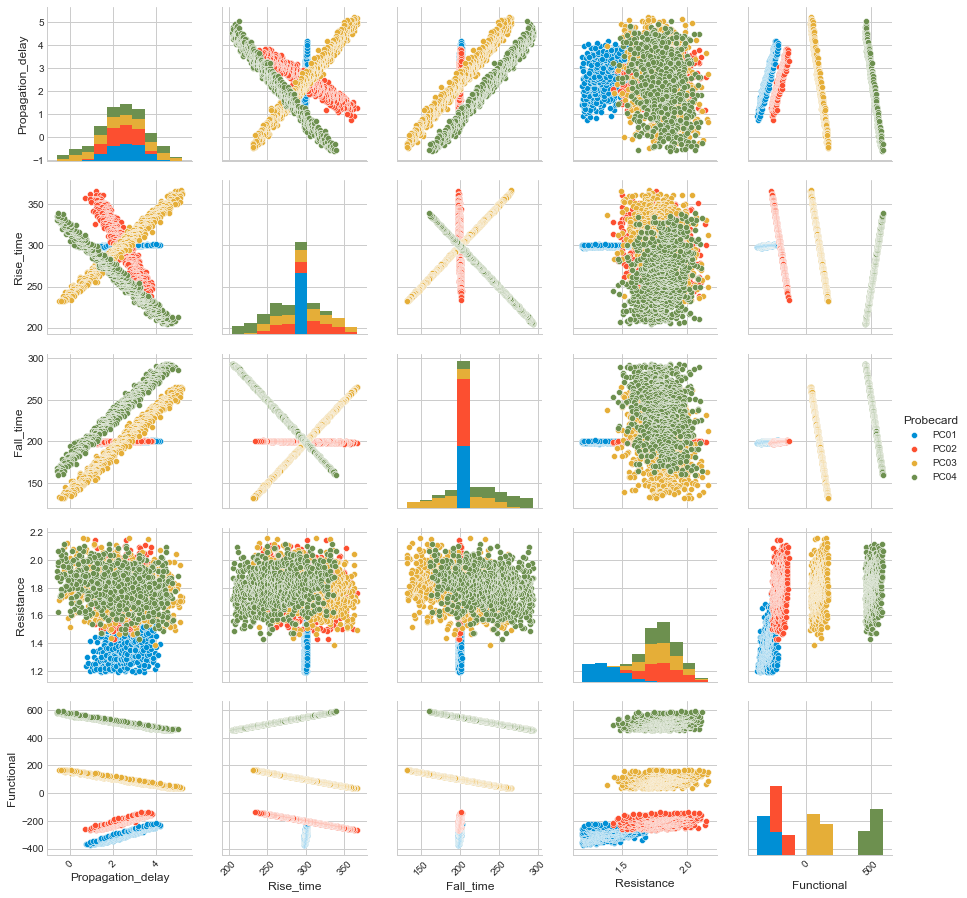

In [30]:
g = sns.pairplot(copydf_sd[['Propagation_delay','Rise_time','Fall_time','Resistance','Functional','Probecard']],hue="Probecard",diag_kind="hist")
for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45 )

## Part 3

### I will be using PCA and LDA with Logistic Regression for the prediction of the 4 probecards 

### Thanks! 
